In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

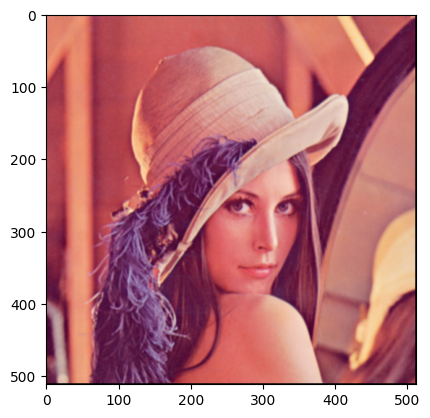

In [2]:
# filtro canny
# primeiro passo - Filtro gaussiano
def filtro_espacial(img, k):
    img2 = np.zeros_like(img)
    lk = k.shape[0] 
    ck = k.shape[1] 
    llin = int(lk/2) 
    lcol = int(ck/2)
    
    for i in range(llin, img.shape[0] - llin):
        for j in range(lcol, img.shape[1] - lcol):
            res = 0
            for m in range(-llin, llin + 1):
                for n in range(-lcol, lcol + 1):
                    res += img[i + m, j + n]*k[llin + m, n + lcol]
            img2[i, j] = res

    return img2

img_path = '../imagens/Lenna.png'
img = cv2.imread(img_path)

k = [[0.3679, 0.6065, 0.3679],
     [0.6065, 1, 0.6065],
     [0.3679, 0.6065, 0.3679]]
k = np.array(k)/4.8905

img_filtro = filtro_espacial(img, k)
plt.imshow(cv2.cvtColor(img_filtro, cv2.COLOR_BGR2RGB))
plt.show()

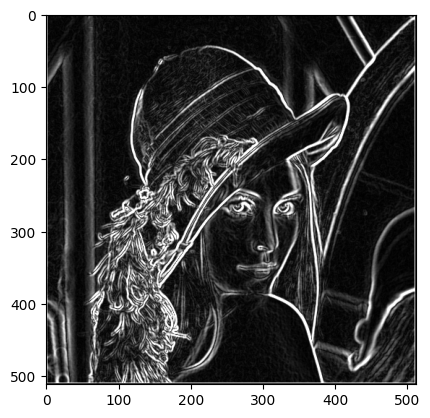

In [3]:
# segundo passo - filtro de sobel
def filtro_sobel(img, k):
    img2 = np.zeros_like(img, dtype=np.float32)
    lk = k.shape[0] 
    ck = k.shape[1] 
    llin = int(lk/2) 
    lcol = int(ck/2)
    
    for i in range(llin, img.shape[0] - llin):
        for j in range(lcol, img.shape[1] - lcol):
            region = img[i - llin:i + llin + 1, j - lcol:j + lcol + 1]
            img2[i, j] = np.sum(region * k)

    return img2

img = cv2.cvtColor(img_filtro, cv2.COLOR_BGR2GRAY)

k1 = np.array([[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]])
k2 = np.array([[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]])

sobelx = filtro_sobel(img, k1)
sobely = filtro_sobel(img, k2)
magnitude = np.abs(sobelx) + np.abs(sobely)

img_filtro_sobel = cv2.convertScaleAbs(magnitude)

plt.imshow(img_filtro_sobel, cmap='gray')
plt.show()


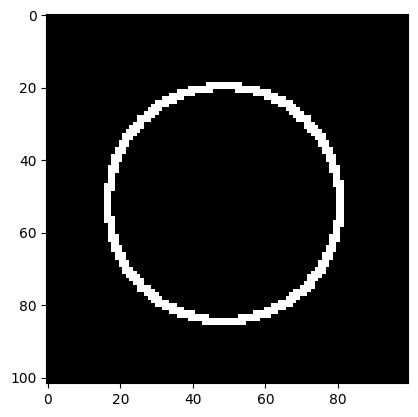

In [4]:
# sobel e quantizacao

k1 = np.array([[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]])
k2 = np.array([[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]])

img_path = '../imagens/circulo.png'
img_circulo = cv2.imread(img_path)
img_circulo = cv2.cvtColor(img_circulo, cv2.COLOR_BGR2GRAY)

img_sobelx_circulo = filtro_sobel(img_circulo, k1)
img_sobely_circulo = filtro_sobel(img_circulo, k2)

magnitude = np.abs(img_sobelx_circulo) + np.abs(img_sobely_circulo)
img_sobel_circulo = cv2.convertScaleAbs(magnitude)

plt.imshow(img_sobel_circulo, cmap='gray')
plt.show()

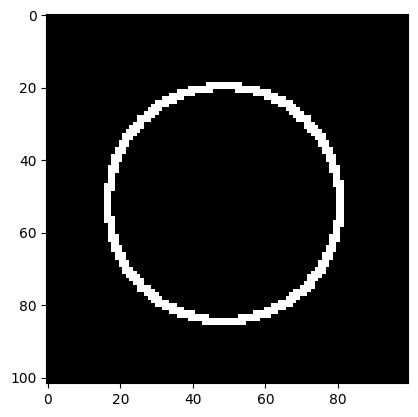

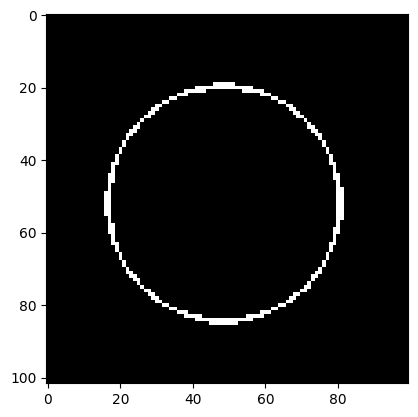

In [12]:
# passo 3 - quantizacao e non-maximum suppression

# def quantizacao(img, theta, magnitude):
#     img2 = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             ang = theta[i, j]*180/np.pi
#             if magnitude[i, j] > 0:
#                 if ang < 0:
#                     ang += 180
#                 if (0 <= ang < 22.5) or (157.5 <= ang <= 180):
#                     img2[i, j] = (255, 255, 0)
#                 elif 22.5 <= ang < 67.5:
#                     img2[i, j] = (0, 255, 0)
#                 elif (67.5 <= ang < 112.5):
#                     img2[i, j] = (255, 0, 0)
#                 elif 112.5 <= ang < 157.5:
#                     img2[i, j] = (0, 0, 255)
    
#     return img2

def non_maximum_supression(img, theta, magnitude):
    img2 = np.zeros_like(img)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            ang = theta[i, j]*180/np.pi
            if magnitude[i, j] > 0:
                if ang < 0:
                    ang += 180
                if (0 <= ang < 22.5) or (157.5 <= ang <= 180):
                    if magnitude[i, j] >= magnitude[i - 1, j] and magnitude[i, j] >= magnitude[i + 1, j]:
                        img2[i, j] = 255
                elif 22.5 <= ang < 67.5:
                    if magnitude[i, j] >= magnitude[i - 1, j - 1] and magnitude[i, j] >= magnitude[i + 1, j + 1]:
                        img2[i, j] = 255
                elif (67.5 <= ang < 112.5):
                    if magnitude[i, j] >= magnitude[i, j - 1] and magnitude[i, j] >= magnitude[i, j + 1]:
                        img2[i, j] = 255
                elif 112.5 <= ang < 157.5:
                    if magnitude[i, j] >= magnitude[i + 1, j - 1] and magnitude[i, j] >= magnitude[i - 1, j + 1]:
                        img2[i, j] = 255
    return img2

theta = np.arctan2(img_sobelx_circulo, img_sobely_circulo)
img_quantizada = non_maximum_supression(img_sobel_circulo, theta, magnitude)
# img_quantizada2 = quantizacao(img_sobel_circulo, theta, magnitude)

plt.imshow(img_sobel_circulo, cmap='gray')
plt.show()
plt.imshow(img_quantizada, cmap='gray')
plt.show()
# plt.imshow(cv2.cvtColor(img_quantizada2, cv2.COLOR_BGR2RGB))
# plt.show()




            



In [ ]:
# passo 4 - thresholding duplo

def thresholding(img, t1, t2):
    img2 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] < t1:
                img[i, j] = 0
            elif img[i, j] > t2:
                img[i, j] = 255
            else:
                img[i, j] = 128
    
    return img2

In [ ]:
# passo 5 - histerese

def histerese():
    pass

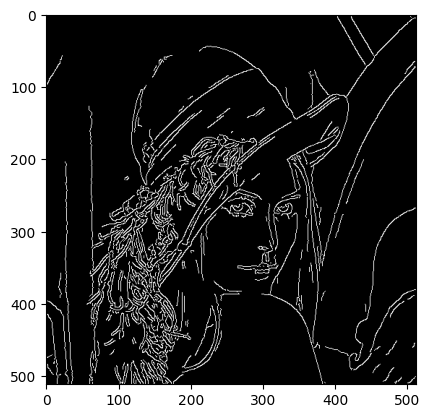

In [5]:
# utilizando opencv, canny
img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gauss = cv2.GaussianBlur(img_gray, (5, 5), 0)
edges = cv2.Canny(img_gauss, 60, 90)

plt.imshow(edges, cmap='gray')
plt.show()